## Cats and Dogs

This is a classic problem of image recognition and classification. 

Let's try to classify input images of cats and dogs into their respective animal category. What the machine needs to do is to see the image and understand by the various features as to whether its a cat or a dog. The features can be like extracting the edges, or extracting the whiskers of a cat etc. The convolutional layer would extract these features.

Visit kaggle to download the dataset: https://www.kaggle.com/c/dogs-vs-cats

For this notebook copy 1/4 of the train images to a validation folder. Use the test images to play around with prediction.

The folder structure looks like this:
- datasets/cats_dogs
    - train
        - cats
        - dogs
    - validation
        - cats
        - dogs
    - test

In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import InputLayer, Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

%matplotlib inline

Using Theano backend.


In [2]:
train_data_dir = "./datasets/cats_dogs/train"
validation_data_dir = "./datasets/cats_dogs/validation"

# dimensions of the images.
img_width, img_height = 150, 150
input_shape=(img_width, img_height, 3)

## loading the images

In [3]:
# used to rescale the pixel values from [0, 255] to [0, 1] interval
datagen = ImageDataGenerator(rescale=1./255)

# retrieve images and their classes for train and validation sets
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


## define the model

In [4]:
model = Sequential()

model.add(InputLayer(input_shape=input_shape))
model.add(Conv2D(filters=32,kernel_size=[3,3]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32,kernel_size=[3,3]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64,kernel_size=[3,3]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [5]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
__________

## loading/training

If the model file exists then load it, else train and save the model.

In [6]:
model_file = "cats_dogs.h5"
if os.path.isfile(model_file):
    model.load_weights(model_file)
else:
    nb_epoch = 15
    model.fit_generator(train_generator, validation_data=validation_generator, epochs=nb_epoch,
                    shuffle=True, verbose=1)
    model.save_weights(model_file)

Epoch 1/15
625/625 [==============================] - 940s 2s/step - loss: 0.6380 - acc: 0.6384 - val_loss: 0.5556 - val_acc: 0.7158
Epoch 2/15
625/625 [==============================] - 945s 2s/step - loss: 0.5319 - acc: 0.7408 - val_loss: 0.4905 - val_acc: 0.7668
Epoch 3/15
625/625 [==============================] - 950s 2s/step - loss: 0.4778 - acc: 0.7782 - val_loss: 0.4486 - val_acc: 0.7904
Epoch 4/15
625/625 [==============================] - 2246s 4s/step - loss: 0.4517 - acc: 0.7966 - val_loss: 0.4452 - val_acc: 0.7882
Epoch 5/15
625/625 [==============================] - 1001s 2s/step - loss: 0.4422 - acc: 0.8049 - val_loss: 0.4333 - val_acc: 0.8022
Epoch 6/15
625/625 [==============================] - 931s 1s/step - loss: 0.4246 - acc: 0.8152 - val_loss: 0.4109 - val_acc: 0.8194
Epoch 7/15
625/625 [==============================] - 3901s 6s/step - loss: 0.4108 - acc: 0.8223 - val_loss: 0.4328 - val_acc: 0.8028
Epoch 8/15
625/625 [==============================] - 914s 1s/step

## evaluating on validation set

In [8]:
scores = model.evaluate_generator(validation_generator, 50)
print("Accuracy = ", scores[1])

Accuracy =  0.84625


A accuracy with less than 0.9 isn't so good. However enough training, let's use it.

## load a sample image from the test collection

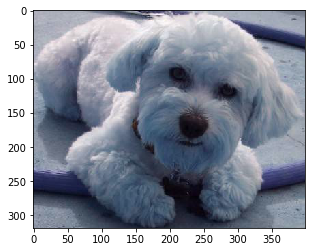

In [29]:
rnd = np.random.randint(low=1,high=9999)
path = './datasets/cats_dogs/test/{0}.jpg'.format(rnd)
img = cv2.imread(path)
plt.imshow(img)

## scaling the image

In [30]:
img = cv2.resize(img,(img_width,img_height))
img = np.reshape(img,[1,img_width,img_height,3])

## predict

In [31]:
def map_class(img_class):
    if img_class[0][0] == 1:
        return 'dog'
    else:
        return 'cat'

img_class = model.predict_classes(img) 
print("Class: ", map_class(img_class))

Class:  dog
